## 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

[
1.0
0.8
0.8
1.0
]
多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

numpy.random.multivariate_normal — NumPy v1.16 Manual

作成したndarrayのshapeは(500, 2)になります。

In [5]:
import numpy as np
from numpy.random import *

mu = [-3, 0]
sigma = [[1, 0.8], [0.8, 1]]
np.random.seed(0)
n_samples = 500
# 2次元正規乱数を1万個生成
values = multivariate_normal(mu, sigma, n_samples)

In [6]:
values.shape

(500, 2)

In [7]:
values[:10]

array([[-4.80006782, -1.54698618],
       [-4.63714503, -0.21987973],
       [-4.46267867, -2.08076347],
       [-3.85346966, -0.94919637],
       [-3.03192065,  0.22776465],
       [-3.59653339,  0.32322993],
       [-3.7604608 , -0.68350676],
       [-3.52660272, -0.31556855],
       [-4.35253112, -1.4822846 ],
       [-3.02691331, -0.56709089]])

## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibのplt.scatter()を使うことで描けます。

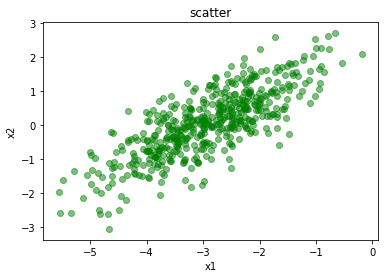

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("scatter")
plt.scatter(values[:,0], values[:,1],  color="green", alpha= 0.5)
plt.show()

## 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムはplt.hist()を使うことで描けます。

matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation

各次元ごとに作成し、2つのヒストグラムとしてください。

それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

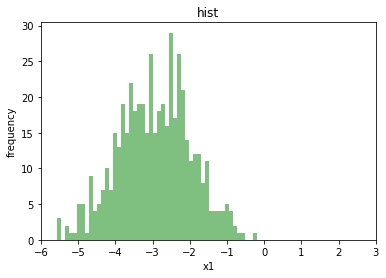

In [9]:
plt.xlabel("x1")
plt.ylabel("frequency")
plt.title("hist")
plt.xlim(-6,3)
plt.hist(values[:,0],bins=50, color="green", alpha= 0.5)
plt.show()

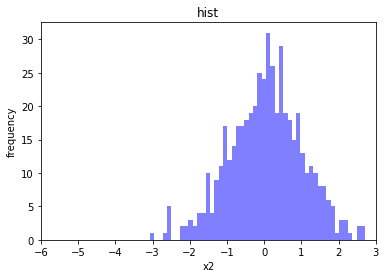

In [10]:
plt.xlabel("x2")
plt.ylabel("frequency")
plt.title("hist")
plt.xlim(-6,3)
plt.hist(values[:,1],bins=50, color="blue", alpha= 0.5)
plt.show()

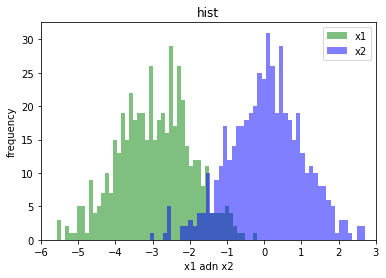

In [11]:
plt.xlabel("x1 adn x2")
plt.ylabel("frequency")
plt.title("hist")
plt.xlim(-6,3)
plt.hist(values[:,0],bins=50, color="green", alpha= 0.5, label="x1")
plt.hist(values[:,1],bins=50, color="blue", alpha= 0.5, label ="x2")
plt.legend()
plt.show()

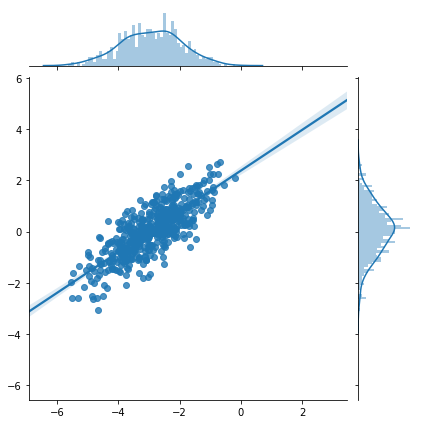

In [12]:
import seaborn as sns

sns.jointplot(values[:,0], values[:,1],kind="reg", marginal_kws=dict(bins=np.linspace(-6, 3,100)))
# sns.jointplot(values2[:,0], values2[:,1], kind="reg",marginal_kws=dict(bins=np.linspace(-6, 3,100)))

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

[
1.0
0.8
0.8
1.0
]
そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題2のものは1を表示してください。

《作成例》

課題のはじめに紹介した図と同じものです。

In [13]:
mu = [0, -3]
sigma = [[1, 0.8], [0.8, 1]]
np.random.seed(0)

# 2次元正規乱数を1万個生成
values2 = multivariate_normal(mu, sigma, 500)

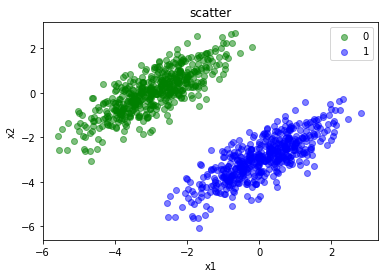

In [14]:
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("scatter")
plt.scatter(values[:,0],values[:,1],color="green", alpha= 0.5,label="0")
plt.scatter(values2[:,0],values2[:,1],color="blue", alpha= 0.5,label="1")
plt.legend()
plt.show()

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。
結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [15]:
values_con = np.concatenate([values,values2], axis=0)
values_con.shape

(1000, 2)

In [16]:
values_con[:10]

array([[-4.80006782, -1.54698618],
       [-4.63714503, -0.21987973],
       [-4.46267867, -2.08076347],
       [-3.85346966, -0.94919637],
       [-3.03192065,  0.22776465],
       [-3.59653339,  0.32322993],
       [-3.7604608 , -0.68350676],
       [-3.52660272, -0.31556855],
       [-4.35253112, -1.4822846 ],
       [-3.02691331, -0.56709089]])

In [17]:
vallues_vs = np.vstack((values,values2))
vallues_vs.shape

(1000, 2)

In [18]:
vallues_vs[:10]

array([[-4.80006782, -1.54698618],
       [-4.63714503, -0.21987973],
       [-4.46267867, -2.08076347],
       [-3.85346966, -0.94919637],
       [-3.03192065,  0.22776465],
       [-3.59653339,  0.32322993],
       [-3.7604608 , -0.68350676],
       [-3.52660272, -0.31556855],
       [-4.35253112, -1.4822846 ],
       [-3.02691331, -0.56709089]])

## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示すラベル付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

In [19]:
values_lavel = np.zeros((500, 1))
values = np.hstack((values,values_lavel))
values[:10]

array([[-4.80006782, -1.54698618,  0.        ],
       [-4.63714503, -0.21987973,  0.        ],
       [-4.46267867, -2.08076347,  0.        ],
       [-3.85346966, -0.94919637,  0.        ],
       [-3.03192065,  0.22776465,  0.        ],
       [-3.59653339,  0.32322993,  0.        ],
       [-3.7604608 , -0.68350676,  0.        ],
       [-3.52660272, -0.31556855,  0.        ],
       [-4.35253112, -1.4822846 ,  0.        ],
       [-3.02691331, -0.56709089,  0.        ]])

In [20]:
values.shape

(500, 3)

In [21]:
value2_lavel = np.ones((500, 1))
values2 = np.hstack((values2,value2_lavel))
values2[:10]

array([[-1.80006782, -4.54698618,  1.        ],
       [-1.63714503, -3.21987973,  1.        ],
       [-1.46267867, -5.08076347,  1.        ],
       [-0.85346966, -3.94919637,  1.        ],
       [-0.03192065, -2.77223535,  1.        ],
       [-0.59653339, -2.67677007,  1.        ],
       [-0.7604608 , -3.68350676,  1.        ],
       [-0.52660272, -3.31556855,  1.        ],
       [-1.35253112, -4.4822846 ,  1.        ],
       [-0.02691331, -3.56709089,  1.        ]])

In [22]:
values_comp = np.concatenate([values,values2], axis=0)
values_comp

array([[-4.80006782, -1.54698618,  0.        ],
       [-4.63714503, -0.21987973,  0.        ],
       [-4.46267867, -2.08076347,  0.        ],
       ...,
       [-0.40484501, -3.14372258,  1.        ],
       [ 0.1584315 , -2.78199606,  1.        ],
       [ 1.20196495, -2.02452628,  1.        ]])

In [23]:
values_comp.shape

(1000, 3)

In [24]:
np.count_nonzero(values_comp[:,2] == 0) #ラベルが０の数をカウント

500

In [25]:
np.count_nonzero(values_comp[:,2] == 1) #ラベルが1の数をカウント

500